Bean Disease Classifier
For this assignment you'll take what you've learned so far and build a classifier for bean disease. You'll be provided with training and validation data based on 224x224 pixel color images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. Your job will be to build a neural network that can tell the difference between the healthy and diseased leaves.

In [1]:
!pip install --upgrade --no-cache-dir gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14759 sha256=1004fe6c6bc0b82e437299721cabb029248a3c1592f88284b49544324f6b1c25
  Stored in directory: /private/var/folders/30/66nftws918j8q599wpzqpflm0000gn/T/pip-ephem-wheel-cache-gojd3t80/wheels/7b/7b/5d/656f46cd6889e4c93977be9586901d0adc1271b2d876c84c96
Successfully built gdown


In [2]:
!gdown "https://drive.google.com/uc?export=download&id=1jSiS-2Wy0AaOg7F7trgAG-KtnVGm2oTb" -O /tmp/train.zip
!gdown "https://drive.google.com/uc?export=download&id=17zP0BYyYBqCgSpYqXjYhikjBVpkxmq8k" -O /tmp/validation.zip
!gdown "https://drive.google.com/uc?export=download&id=17TzNBWdjWGgVRyy7cHMzFWrOXvIhRz6m" -O /tmp/test.zip

Downloading...
From: https://drive.google.com/uc?export=download&id=1jSiS-2Wy0AaOg7F7trgAG-KtnVGm2oTb
To: /tmp/train.zip
100%|█████████████████████████████████████████| 144M/144M [04:20<00:00, 552kB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=17zP0BYyYBqCgSpYqXjYhikjBVpkxmq8k
To: /tmp/validation.zip
100%|██████████████████████████████████████| 18.5M/18.5M [00:16<00:00, 1.12MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=17TzNBWdjWGgVRyy7cHMzFWrOXvIhRz6m
To: /tmp/test.zip
100%|██████████████████████████████████████| 17.7M/17.7M [00:17<00:00, 1.00MB/s]


In [3]:
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

TRAIN_DIRECTORY_LOCATION = '/tmp/train'
VAL_DIRECTORY_LOCATION = '/tmp/validation'
TARGET_SIZE = (224, 224)
CLASS_MODE = 'categorical'

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,  
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,  
    batch_size = 128,
    class_mode = CLASS_MODE
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


Like with the CIFAR-10 assignment, your model may want to learn some high level features and then classify them. This time it may help to make the model a little wider at times.

In [9]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
])

# This will print a summary of your model when you're done!
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

Then you'll need to pick an appropriate loss function and optimizer.

A hint: remember we are classifying again.

In [10]:
# from tensorflow.keras.optimizers import RMSprop
# OPTIMIZER = RMSprop(lr=0.0001)

from tensorflow.keras.optimizers import Adam
OPTIMIZER = Adam(lr=0.001)

LOSS_FUNCTION = 'categorical_crossentropy'

model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

Finally select the number of epochs you'd like to train for and train your model!

A hint: something in the low tens is a good place to start


In [11]:
NUM_EPOCHS = 20

history = model.fit(
      train_generator, 
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

Epoch 1/20


2022-05-31 12:21:45.884155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 1.2511 - accuracy: 0.3752

2022-05-31 12:21:58.269517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 14s 1s/step - loss: 1.2511 - accuracy: 0.3752 - val_loss: 1.0888 - val_accuracy: 0.3609
Epoch 2/20
9/9 [==============================] - 11s 1s/step - loss: 1.0483 - accuracy: 0.4507 - val_loss: 0.8809 - val_accuracy: 0.5940
Epoch 3/20
9/9 [==============================] - 12s 1s/step - loss: 0.9342 - accuracy: 0.5580 - val_loss: 0.8124 - val_accuracy: 0.6391
Epoch 4/20
9/9 [==============================] - 12s 1s/step - loss: 0.8759 - accuracy: 0.6044 - val_loss: 0.8927 - val_accuracy: 0.5639
Epoch 5/20
9/9 [==============================] - 12s 1s/step - loss: 0.8742 - accuracy: 0.5928 - val_loss: 0.8541 - val_accuracy: 0.5188
Epoch 6/20
9/9 [==============================] - 12s 1s/step - loss: 0.8271 - accuracy: 0.6315 - val_loss: 0.7383 - val_accuracy: 0.6767
Epoch 7/20
9/9 [==============================] - 12s 1s/step - loss: 0.7961 - accuracy: 0.6518 - val_loss: 0.8045 - val_accuracy: 0.5714
Epoch 8/20
9/9 [=============================

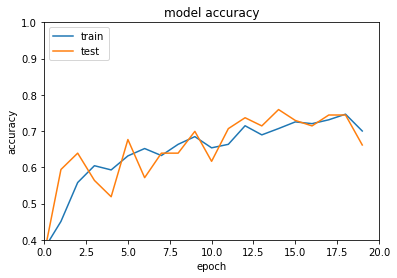

In [12]:
# summarize history for accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()